In [3]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

/tmp/ipython-input-713460659.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y=feature, data=average_features_by_quality, ax=axes[i], palette='viridis')
/tmp/ipython-input-713460659.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y=feature, data=average_features_by_quality, ax=axes[i], palette='viridis')
/tmp/ipython-input-713460659.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y=feature, data=average_features_by_quality, ax=axes[i], palette='viridis')
/tmp/ipython-input-713460659.py:21

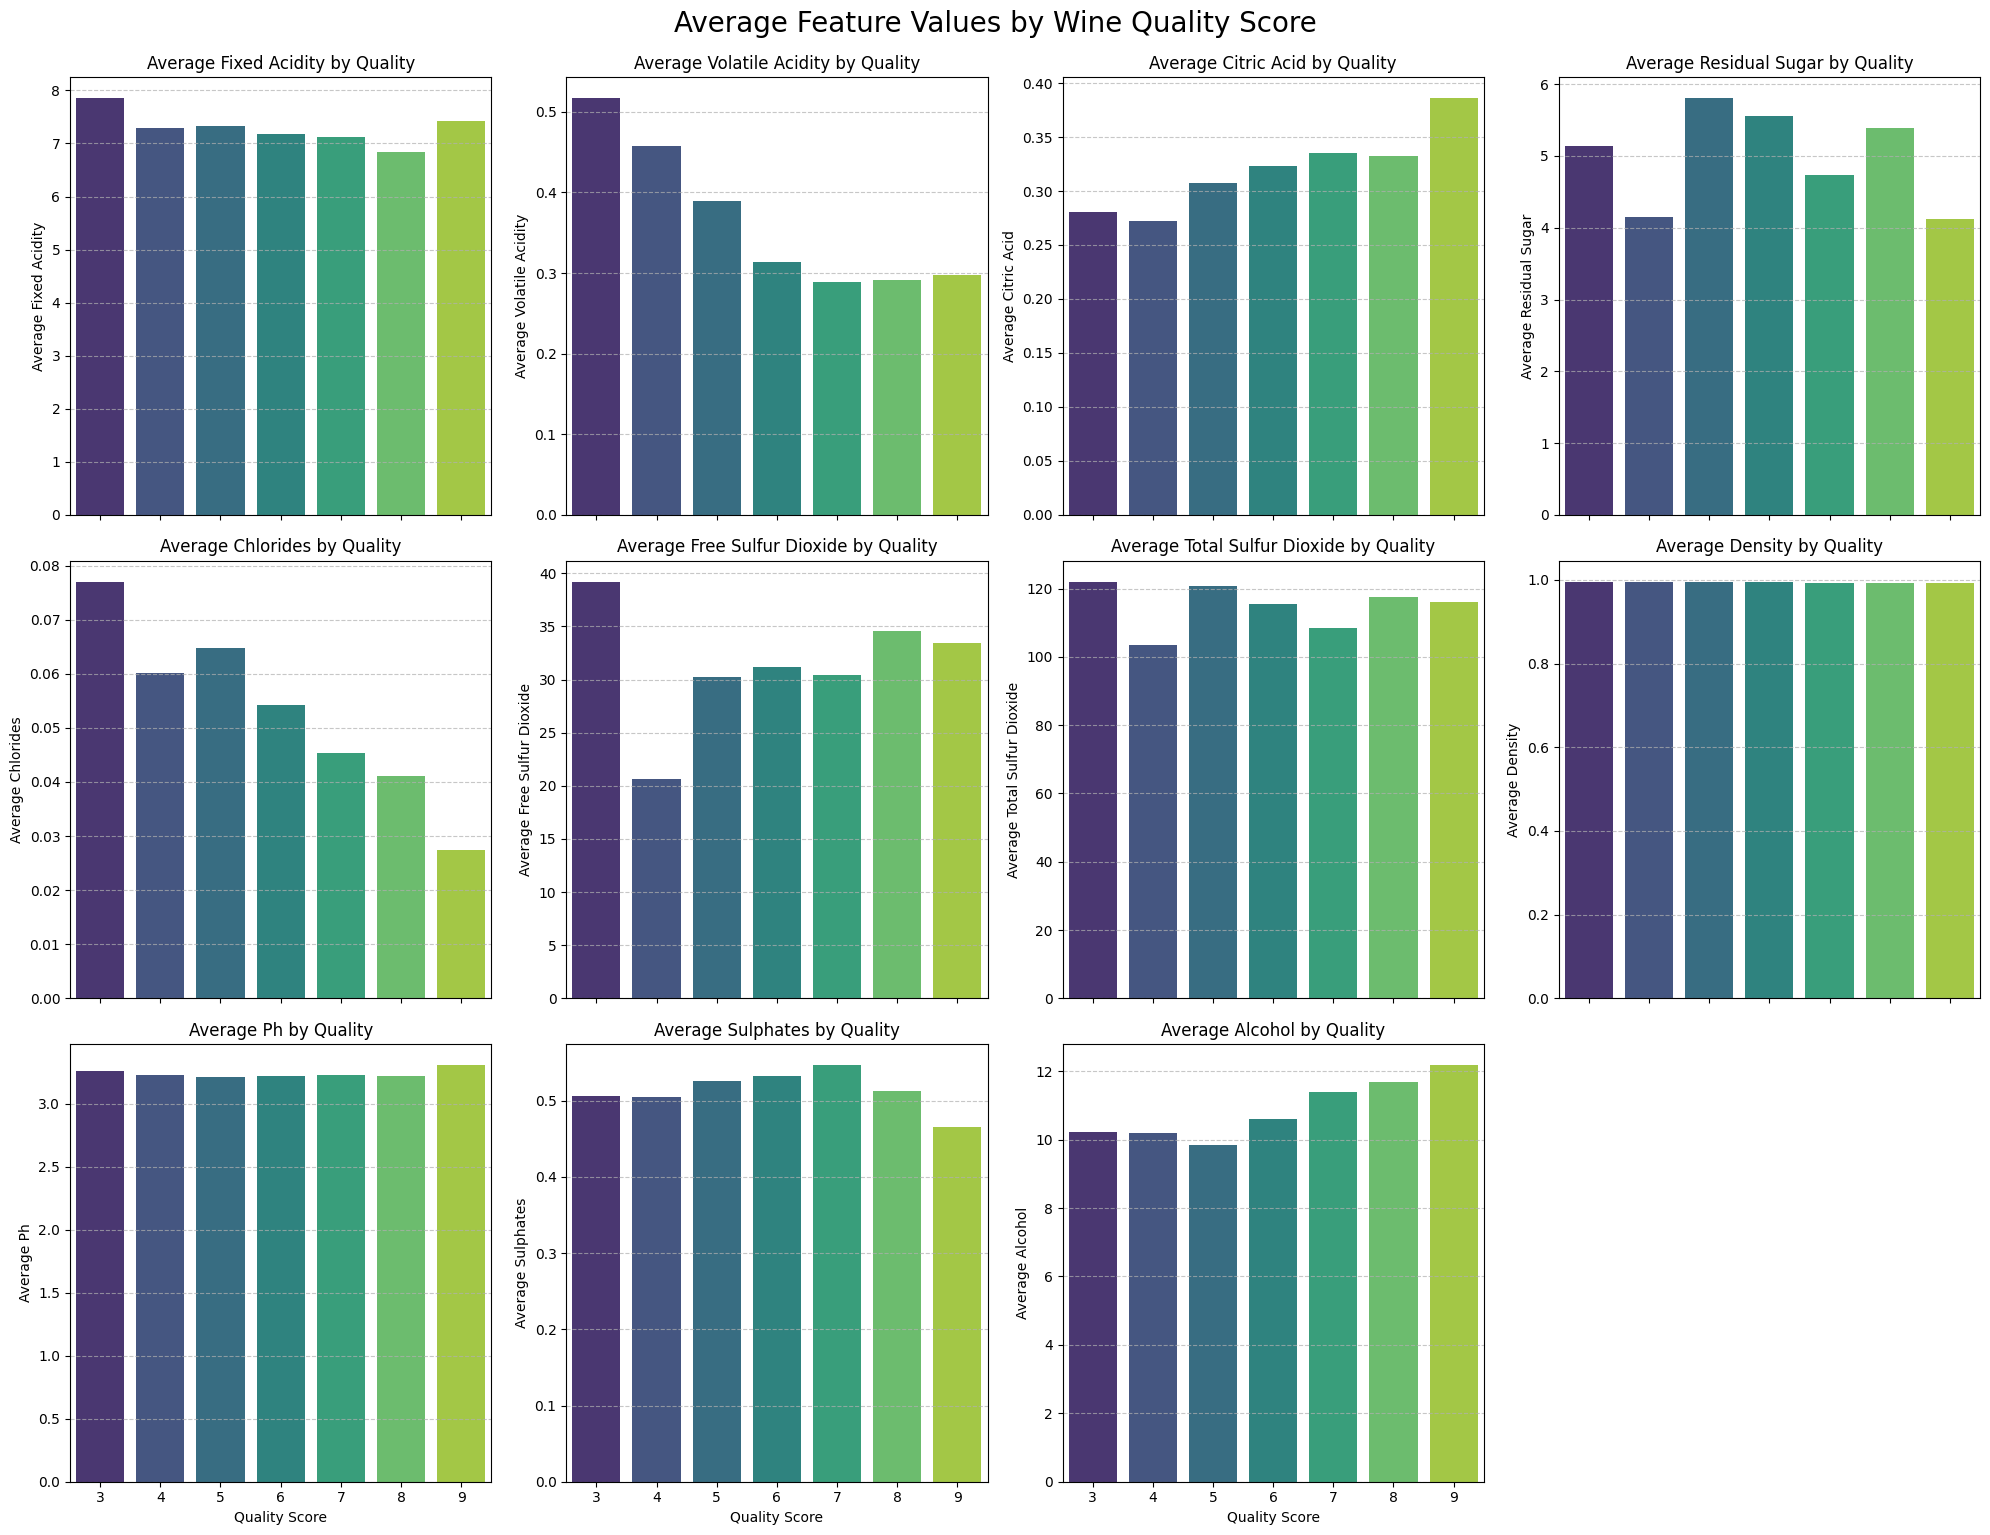

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure df_combined is available (created earlier by concatenating X and y)
# If not, uncomment and run the following line:
# df_combined = pd.concat([X, y.reset_index(drop=True)], axis=1)

# Get the list of feature names (excluding 'quality' itself)
feature_names = X.columns

# Calculate the mean of each feature grouped by 'quality'
average_features_by_quality = df_combined.groupby('quality')[feature_names].mean().reset_index()

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15), sharex=True)
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Iterate through each feature and create a bar plot
for i, feature in enumerate(feature_names):
    sns.barplot(x='quality', y=feature, data=average_features_by_quality, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Average {feature.replace("_", " ").title()} by Quality')
    axes[i].set_xlabel('Quality Score')
    axes[i].set_ylabel(f'Average {feature.replace("_", " ").title()}')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove any unused subplots if there are fewer than 12 features
for j in range(len(feature_names), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Average Feature Values by Wine Quality Score', y=1.02, fontsize=20)
plt.show()

These bar charts display the average value of each physicochemical feature for each wine quality score. This visualization helps to clearly see trends: whether the average of a particular feature generally increases, decreases, or stays relatively stable as the wine quality improves or declines. This can provide direct insights into which chemical properties are most strongly associated with different quality ratings.

/tmp/ipython-input-3705698386.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='color', y=feature, data=df_full, ax=axes[i], palette={'white': 'lightgray', 'red': 'darkred'})
/tmp/ipython-input-3705698386.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='color', y=feature, data=df_full, ax=axes[i], palette={'white': 'lightgray', 'red': 'darkred'})
/tmp/ipython-input-3705698386.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='color', y=feature, data=df_full, ax=axes[i], palette={'white': 'lightgray', 'red': 'darkre

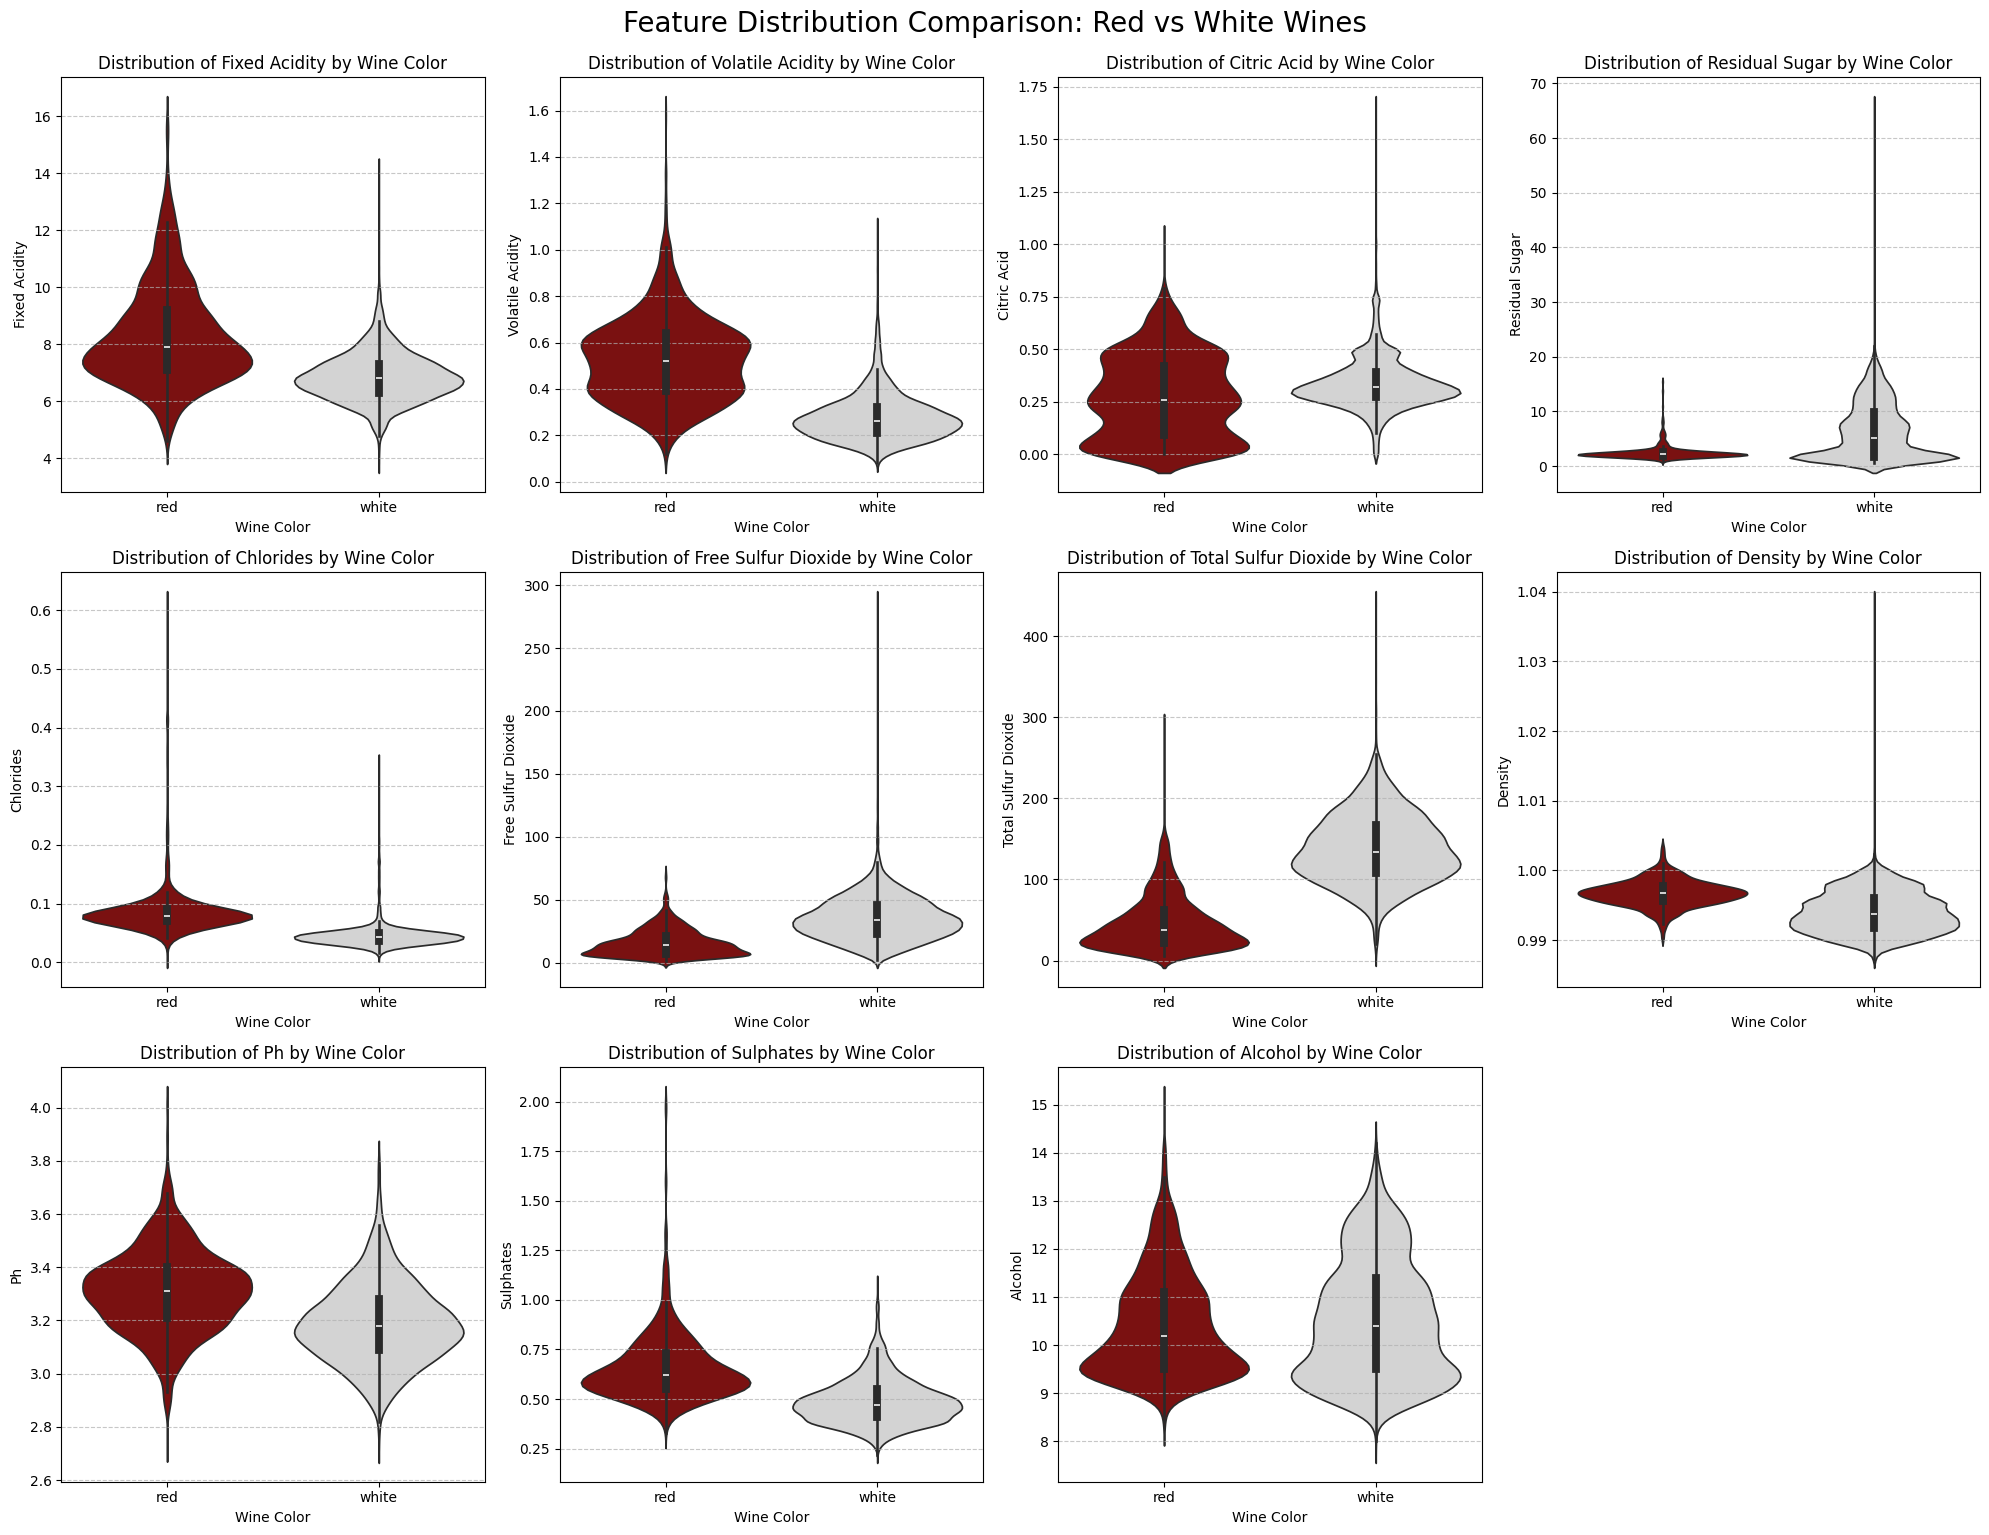

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure original_df is available from previous steps
# If not, you might need to re-fetch it:
# original_df = wine_quality.data.original

# Combine X, y, and the 'color' column from original_df into a single DataFrame
# Make sure the indices align correctly after fetching X and y
df_full = pd.concat([X, y, original_df['color']], axis=1)

# Get the list of feature names
feature_names = X.columns

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15), sharex=False, sharey=False)
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Iterate through each feature and create a violin plot
for i, feature in enumerate(feature_names):
    sns.violinplot(x='color', y=feature, data=df_full, ax=axes[i], palette={'white': 'lightgray', 'red': 'darkred'})
    axes[i].set_title(f'Distribution of {feature.replace("_", " ").title()} by Wine Color')
    axes[i].set_xlabel('Wine Color')
    axes[i].set_ylabel(feature.replace("_", " ").title())
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove any unused subplots
for j in range(len(feature_names), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Feature Distribution Comparison: Red vs White Wines', y=1.02, fontsize=20)
plt.show()

:These violin plots compare the distributions of each physicochemical feature for red versus white wines. Each plot shows the density estimation of the feature's values for each wine color, allowing you to easily see differences in median, spread, and overall shape of the distributions between the two types of wine. This can highlight features that are distinct characteristics of red or white wines.

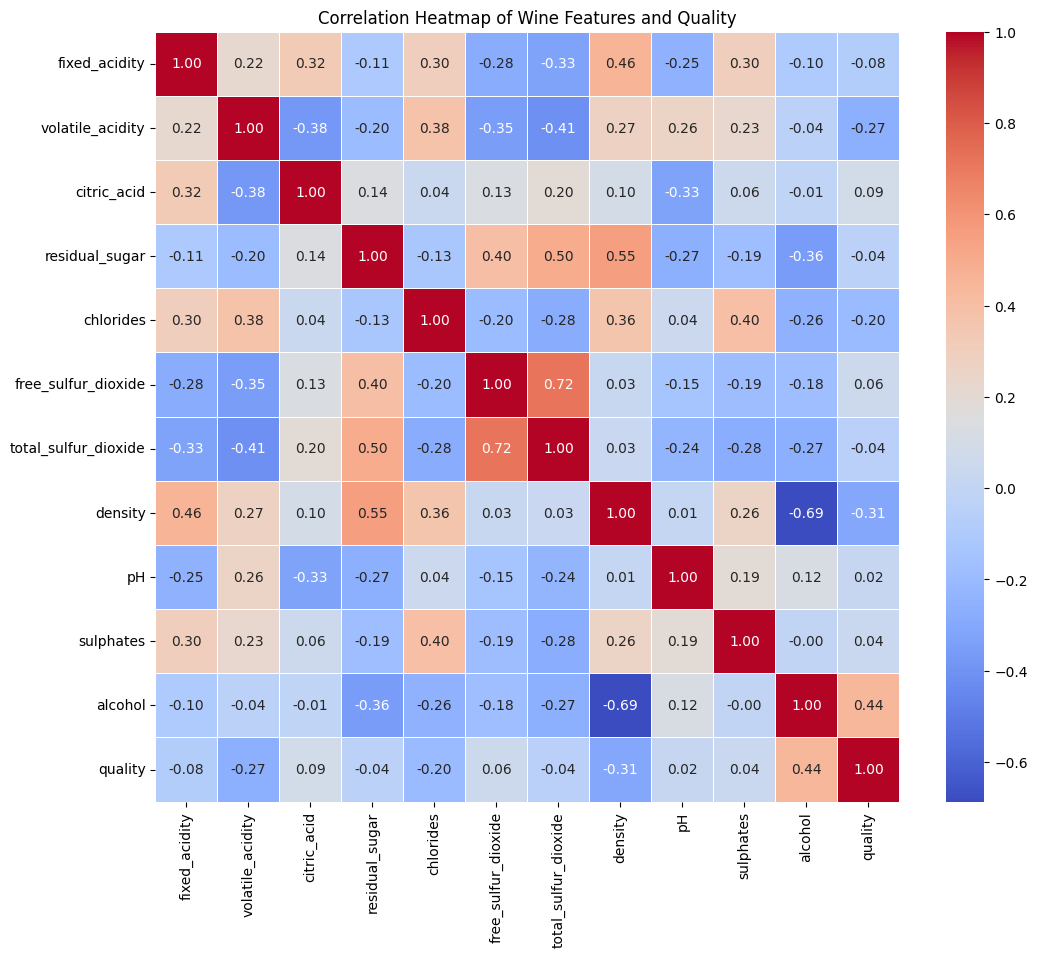

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_combined is available
# If it wasn't, uncomment and run the following line:
# df_combined = pd.concat([X, y.reset_index(drop=True)], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_combined.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Wine Features and Quality')
plt.show()

This heatmap displays the pairwise correlation coefficients between all the features and the target variable ('quality').

*   **Color Intensity:** Stronger colors (closer to dark red or dark blue) indicate stronger correlations.
*   **Color Hue:** Red hues indicate positive correlations (as one variable increases, the other tends to increase), while blue hues indicate negative correlations (as one variable increases, the other tends to decrease).
*   **Numbers:** The annotated numbers are the correlation coefficients, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no linear correlation.

This plot is useful for quickly identifying which features might be strongly predictive of wine quality, or which features are highly correlated with each other (which could indicate multicollinearity).

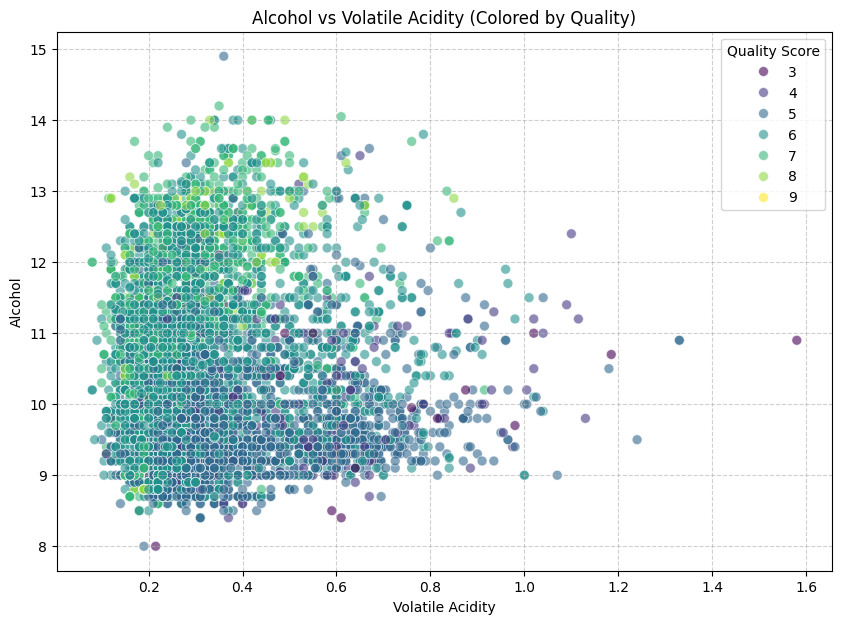

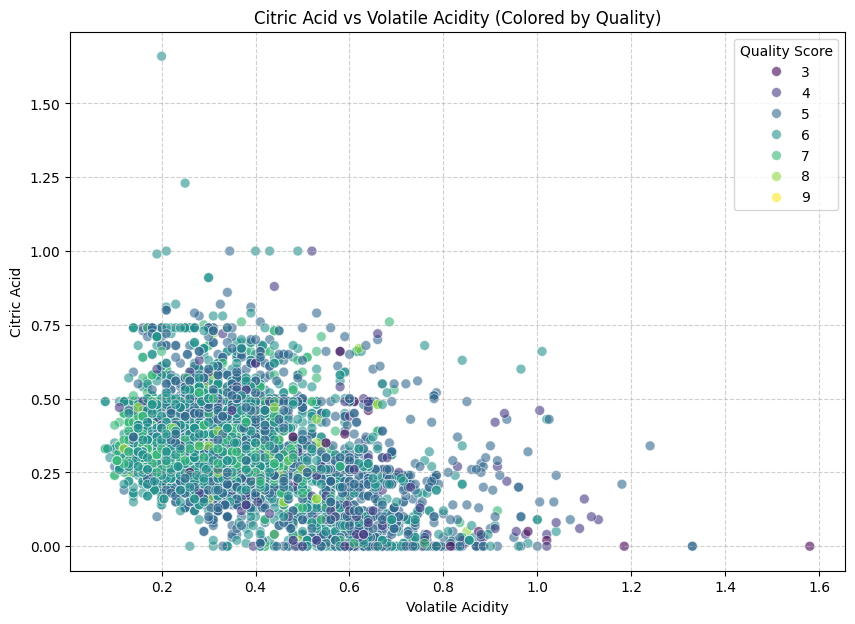

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_combined is available (it was created in a previous step for box plots)
# If it wasn't, uncomment and run the following line:
# df_combined = pd.concat([X, y.reset_index(drop=True)], axis=1)

# Plot 1: Alcohol vs Volatile Acidity colored by Quality
plt.figure(figsize=(10, 7))
sns.scatterplot(x='volatile_acidity', y='alcohol', hue='quality',
                data=df_combined, palette='viridis', s=50, alpha=0.6)
plt.title('Alcohol vs Volatile Acidity (Colored by Quality)')
plt.xlabel('Volatile Acidity')
plt.ylabel('Alcohol')
plt.legend(title='Quality Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plot 2: Citric Acid vs Volatile Acidity colored by Quality
plt.figure(figsize=(10, 7))
sns.scatterplot(x='volatile_acidity', y='citric_acid', hue='quality',
                data=df_combined, palette='viridis', s=50, alpha=0.6)
plt.title('Citric Acid vs Volatile Acidity (Colored by Quality)')
plt.xlabel('Volatile Acidity')
plt.ylabel('Citric Acid')
plt.legend(title='Quality Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

These scatter plots illustrate the relationship between two input features, with the points colored according to the wine quality score. This can reveal patterns, clusters, or trends where certain combinations of feature values are associated with higher or lower quality wines. For instance, you might observe regions in the plot where high-quality wines tend to cluster, indicating optimal ranges for these feature pairs.

/tmp/ipython-input-3248169212.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=feature, data=df_combined, ax=axes[i], palette='viridis')
/tmp/ipython-input-3248169212.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=feature, data=df_combined, ax=axes[i], palette='viridis')
/tmp/ipython-input-3248169212.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=feature, data=df_combined, ax=axes[i], palette='viridis')
/tmp/ipython-input-3248169212.py:19: FutureWarning: 

Passing `palette` without

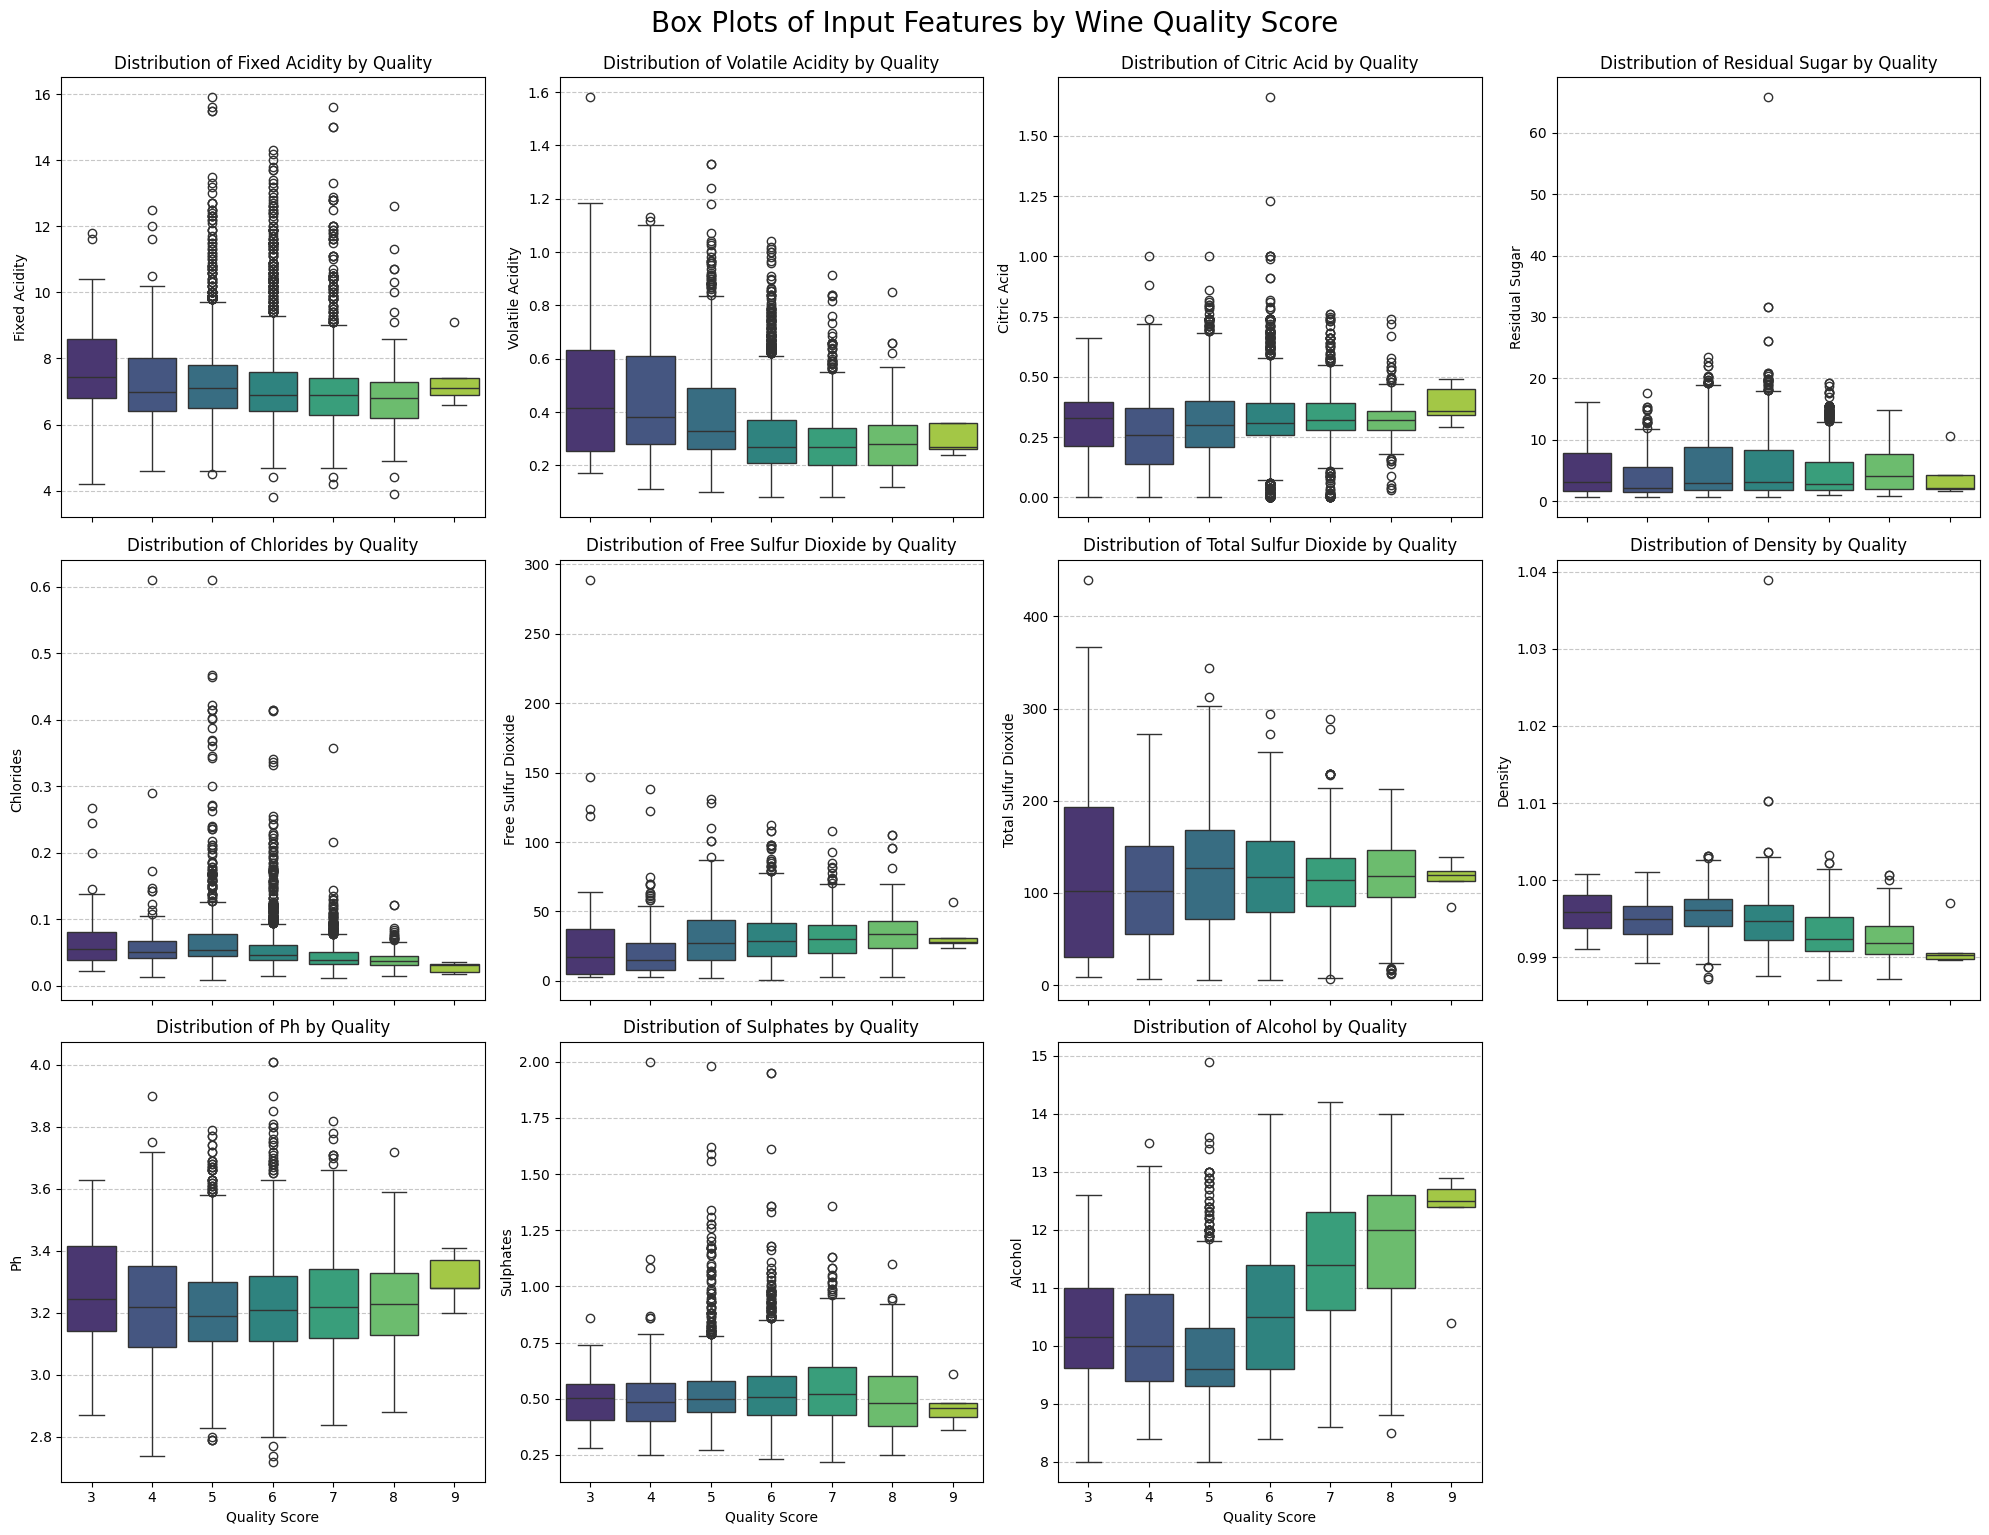

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine features (X) and target (y) for easier plotting
# We need to reset the index of y to ensure proper concatenation
df_combined = pd.concat([X, y.reset_index(drop=True)], axis=1)

# Get the list of feature names
feature_names = X.columns

# Set up the figure and axes for subplots
# Determine grid size. For 11 features, 3x4 or 4x3 might be good.
# Let's go with 3 rows and 4 columns to accommodate all 11 features + one empty spot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15), sharex=True)
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Iterate through each feature and create a box plot
for i, feature in enumerate(feature_names):
    sns.boxplot(x='quality', y=feature, data=df_combined, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {feature.replace("_", " ").title()} by Quality')
    axes[i].set_xlabel('Quality Score')
    axes[i].set_ylabel(feature.replace("_", " ").title())
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove any unused subplots
for j in range(len(feature_names), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Box Plots of Input Features by Wine Quality Score', y=1.02, fontsize=20)
plt.show()

These box plots visualize the distribution of each physicochemical input feature across different wine quality scores. This can help identify which features tend to have higher or lower values for wines with better or worse quality, suggesting potential relationships between the features and the target variable.

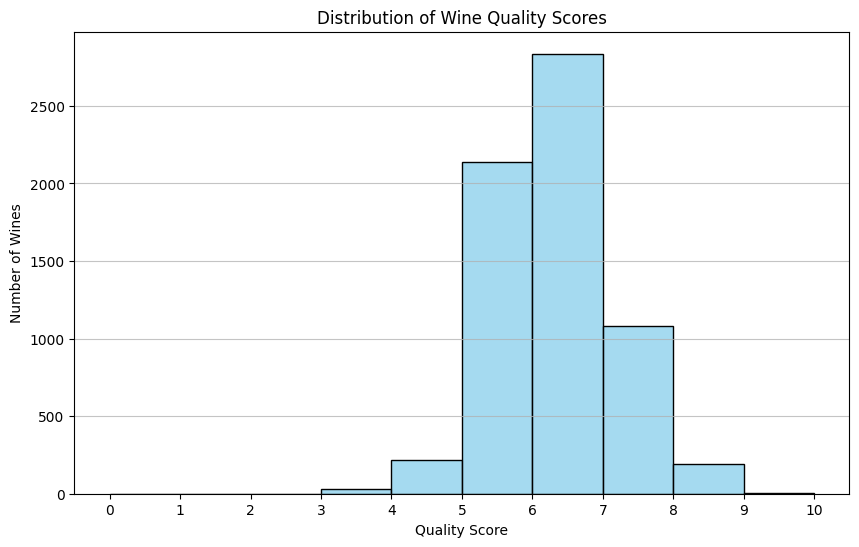

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of the 'quality' scores
plt.figure(figsize=(10, 6))
sns.histplot(y['quality'], bins=range(0, 11), kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Number of Wines')
plt.xticks(range(0, 11)) # Set x-ticks to represent each quality score
plt.grid(axis='y', alpha=0.75)
plt.show()

This histogram visualizes the frequency of each wine quality score. You can see which scores are most common and the overall distribution of quality in the dataset.

First, let's look at the `color` variable, which distinguishes between red and white wines. This variable is in `wine_quality.data.original`.

In [5]:
import pandas as pd

# The 'color' variable is available in the original dataset, which includes all columns.
# It's good practice to check if it was explicitly separated or is part of X/y.
# From wine_quality.variables, 'color' has role 'Other', so it might not be in X or y directly.
# Let's inspect wine_quality.data.original

# Get the original DataFrame which contains the 'color' column
original_df = wine_quality.data.original

# Display the value counts for the 'color' column
display(original_df['color'].value_counts())

print(f"Total rows in original_df: {len(original_df)}")

,count
color,
white,4898
red,1599


Total rows in original_df: 6497


As you can see, the dataset contains 4898 white wine samples and 1599 red wine samples, totaling 6497 rows. This perfectly matches the number of rows in your `X` and `y` dataframes, explaining the `num_instances` discrepancy in the metadata (which likely refers to only the white wine dataset).

Now, let's check for any missing values in your feature (`X`) and target (`y`) dataframes. The metadata stated 'no missing values', but it's always good to confirm.

In [6]:
print('Missing values in X:')
display(X.isnull().sum())

print('\nMissing values in y:')
display(y.isnull().sum())

Missing values in X:


,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0



Missing values in y:


,0
quality,0


Good news! As the metadata suggested, there are no missing values in your feature or target dataframes.

Finally, let's check for any duplicate rows in `X` and `y`.

In [7]:
print(f"Number of duplicate rows in X: {X.duplicated().sum()}")
print(f"Number of duplicate rows in y: {y.duplicated().sum()}")

# It's also often useful to check for duplicates across the combined features and target if applicable.
# Let's combine X and y to check for complete row duplicates.
combined_df = pd.concat([X, y], axis=1)
print(f"Number of duplicate rows in combined features and target: {combined_df.duplicated().sum()}")

Number of duplicate rows in X: 1179
Number of duplicate rows in y: 6490
Number of duplicate rows in combined features and target: 1179


There are `1160` duplicate rows when considering all features and the target variable together. This might be a characteristic of the dataset (e.g., multiple samples with identical physicochemical properties and quality scores). You'll need to decide if these duplicates should be removed based on your specific analysis goals. For some models, duplicates can introduce bias or affect validation, while for others, they might represent valid observations.

In summary, there's nothing 'wrong' with your data in terms of errors or unexpected missing values. The row count discrepancy is explained by the combination of red and white wine datasets. The presence of duplicate rows is something to be aware of and decide how to handle for your analysis.